<a href="https://colab.research.google.com/github/NatashaKamami/Machine-Learning-1/blob/main/Credit_risk_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Importing necessary libraries and loading the dataset**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [29]:
credit = pd.read_csv("/content/raw-data.csv")
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [30]:
#Renaming columns in the dataset with their correct names
credit_data = credit.rename(columns={'V1': 'Customer_ID', 'V2': 'Customer_has_bounced_in_first_EMI','V3': 'No_of_times_bounced_12_months','V4': 'Maximum_MOB',
                                      'V5': 'No_of_times_bounced_while_repaying_the_loan','V6': 'EMI','V7': 'Loan_Amount','V8': 'Tenure',
                                      'V9': 'Dealer_codes_from_where_customer_has_purchased_the_Two_wheeler','V10': 'Product_code_of_Two_wheeler',
                                      'V11': 'No_of_advance_EMI_paid','V12': 'Rate_of_interest','V13': 'Gender','V14': 'Employment_type','V15': 'Resident_type_of_customer',
                                      'V16': 'Date_of_birth','V17': 'Customer_age_when_loan_was_taken','V18': 'No_of_loans','V19': 'No_of_secured_loans',
                                      'V20': 'No_of_unsecured_loans','V21': 'Max_amount_sanctioned_in_the_Live_loans','V22': 'No_of_new_loans_in_last_3_months',
                                      'V23': 'Total_sanctioned_amount_in_the_secured_Loans_which_are_Live','V24': 'Total_sanctioned_amount_in_the_unsecured_Loans_which_are_Live',
                                      'V25': 'Maximum_amount_sanctioned_for_any_Two_wheeler_loan','V26': 'Time_since_last_Personal_loan_taken_in_months',
                                      'V27': 'Time_since_first_consumer_durables_loan_taken_in_months','V28': 'No_of_times_30_days_past_due_in_last_6_months',
                                      'V29': 'No_of_times_60_days_past_due_in_last_6_months','V30': 'No_of_times_90_days_past_due_in_last_3_months','V31': 'Tier',
                                      'V32': 'Target_variable'})
credit_data.head(2)

,Customer_ID,Customer_has_bounced_in_first_EMI,No_of_times_bounced_12_months,Maximum_MOB,No_of_times_bounced_while_repaying_the_loan,EMI,Loan_Amount,Tenure,Dealer_codes_from_where_customer_has_purchased_the_Two_wheeler,Product_code_of_Two_wheeler,...,Total_sanctioned_amount_in_the_secured_Loans_which_are_Live,Total_sanctioned_amount_in_the_unsecured_Loans_which_are_Live,Maximum_amount_sanctioned_for_any_Two_wheeler_loan,Time_since_last_Personal_loan_taken_in_months,Time_since_first_consumer_durables_loan_taken_in_months,No_of_times_30_days_past_due_in_last_6_months,No_of_times_60_days_past_due_in_last_6_months,No_of_times_90_days_past_due_in_last_3_months,Tier,Target_variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


##**Data Cleaning and Overview of the data**

In [31]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer_ID                                                     119528 non-null  int64  
 1   Customer_has_bounced_in_first_EMI                               119528 non-null  int64  
 2   No_of_times_bounced_12_months                                   119528 non-null  int64  
 3   Maximum_MOB                                                     85048 non-null   float64
 4   No_of_times_bounced_while_repaying_the_loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan_Amount                                                     85048 non-null   float64
 7   Tenure                                

In [32]:
percentage = (credit_data.isnull().sum() / len(credit_data)) * 100
percentage

,0
Customer_ID,0.000000
Customer_has_bounced_in_first_EMI,0.000000
No_of_times_bounced_12_months,0.000000
Maximum_MOB,28.846797
No_of_times_bounced_while_repaying_the_loan,28.846797
EMI,28.846797
Loan_Amount,28.846797
Tenure,28.846797
Dealer_codes_from_where_customer_has_purchased_the_Two_wheeler,28.846797
Product_code_of_Two_wheeler,28.846797


In [33]:
credit_data['No_of_new_loans_in_last_3_months'].value_counts()

,count
No_of_new_loans_in_last_3_months,
0,119528


###**Dealing with missing values**

In [34]:
# Dropping an unnecessary column with only zeros as records
credit_data.drop(columns= 'No_of_new_loans_in_last_3_months', inplace=True)

# Dropping an unnecessary column of date of birth since its more important to have age a loan was approved rather than customers date of birth
credit_data.drop(columns= 'Date_of_birth', inplace=True)

In [35]:
# Dropping columns with missing values amounting to more than 50% of the data
dropping = ['Time_since_first_consumer_durables_loan_taken_in_months',
            'Time_since_last_Personal_loan_taken_in_months',
            'Max_amount_sanctioned_in_the_Live_loans',
            'Total_sanctioned_amount_in_the_secured_Loans_which_are_Live',
            'Total_sanctioned_amount_in_the_unsecured_Loans_which_are_Live',
            'Maximum_amount_sanctioned_for_any_Two_wheeler_loan']

credit_data.drop(columns=dropping, inplace=True)

<Axes: >

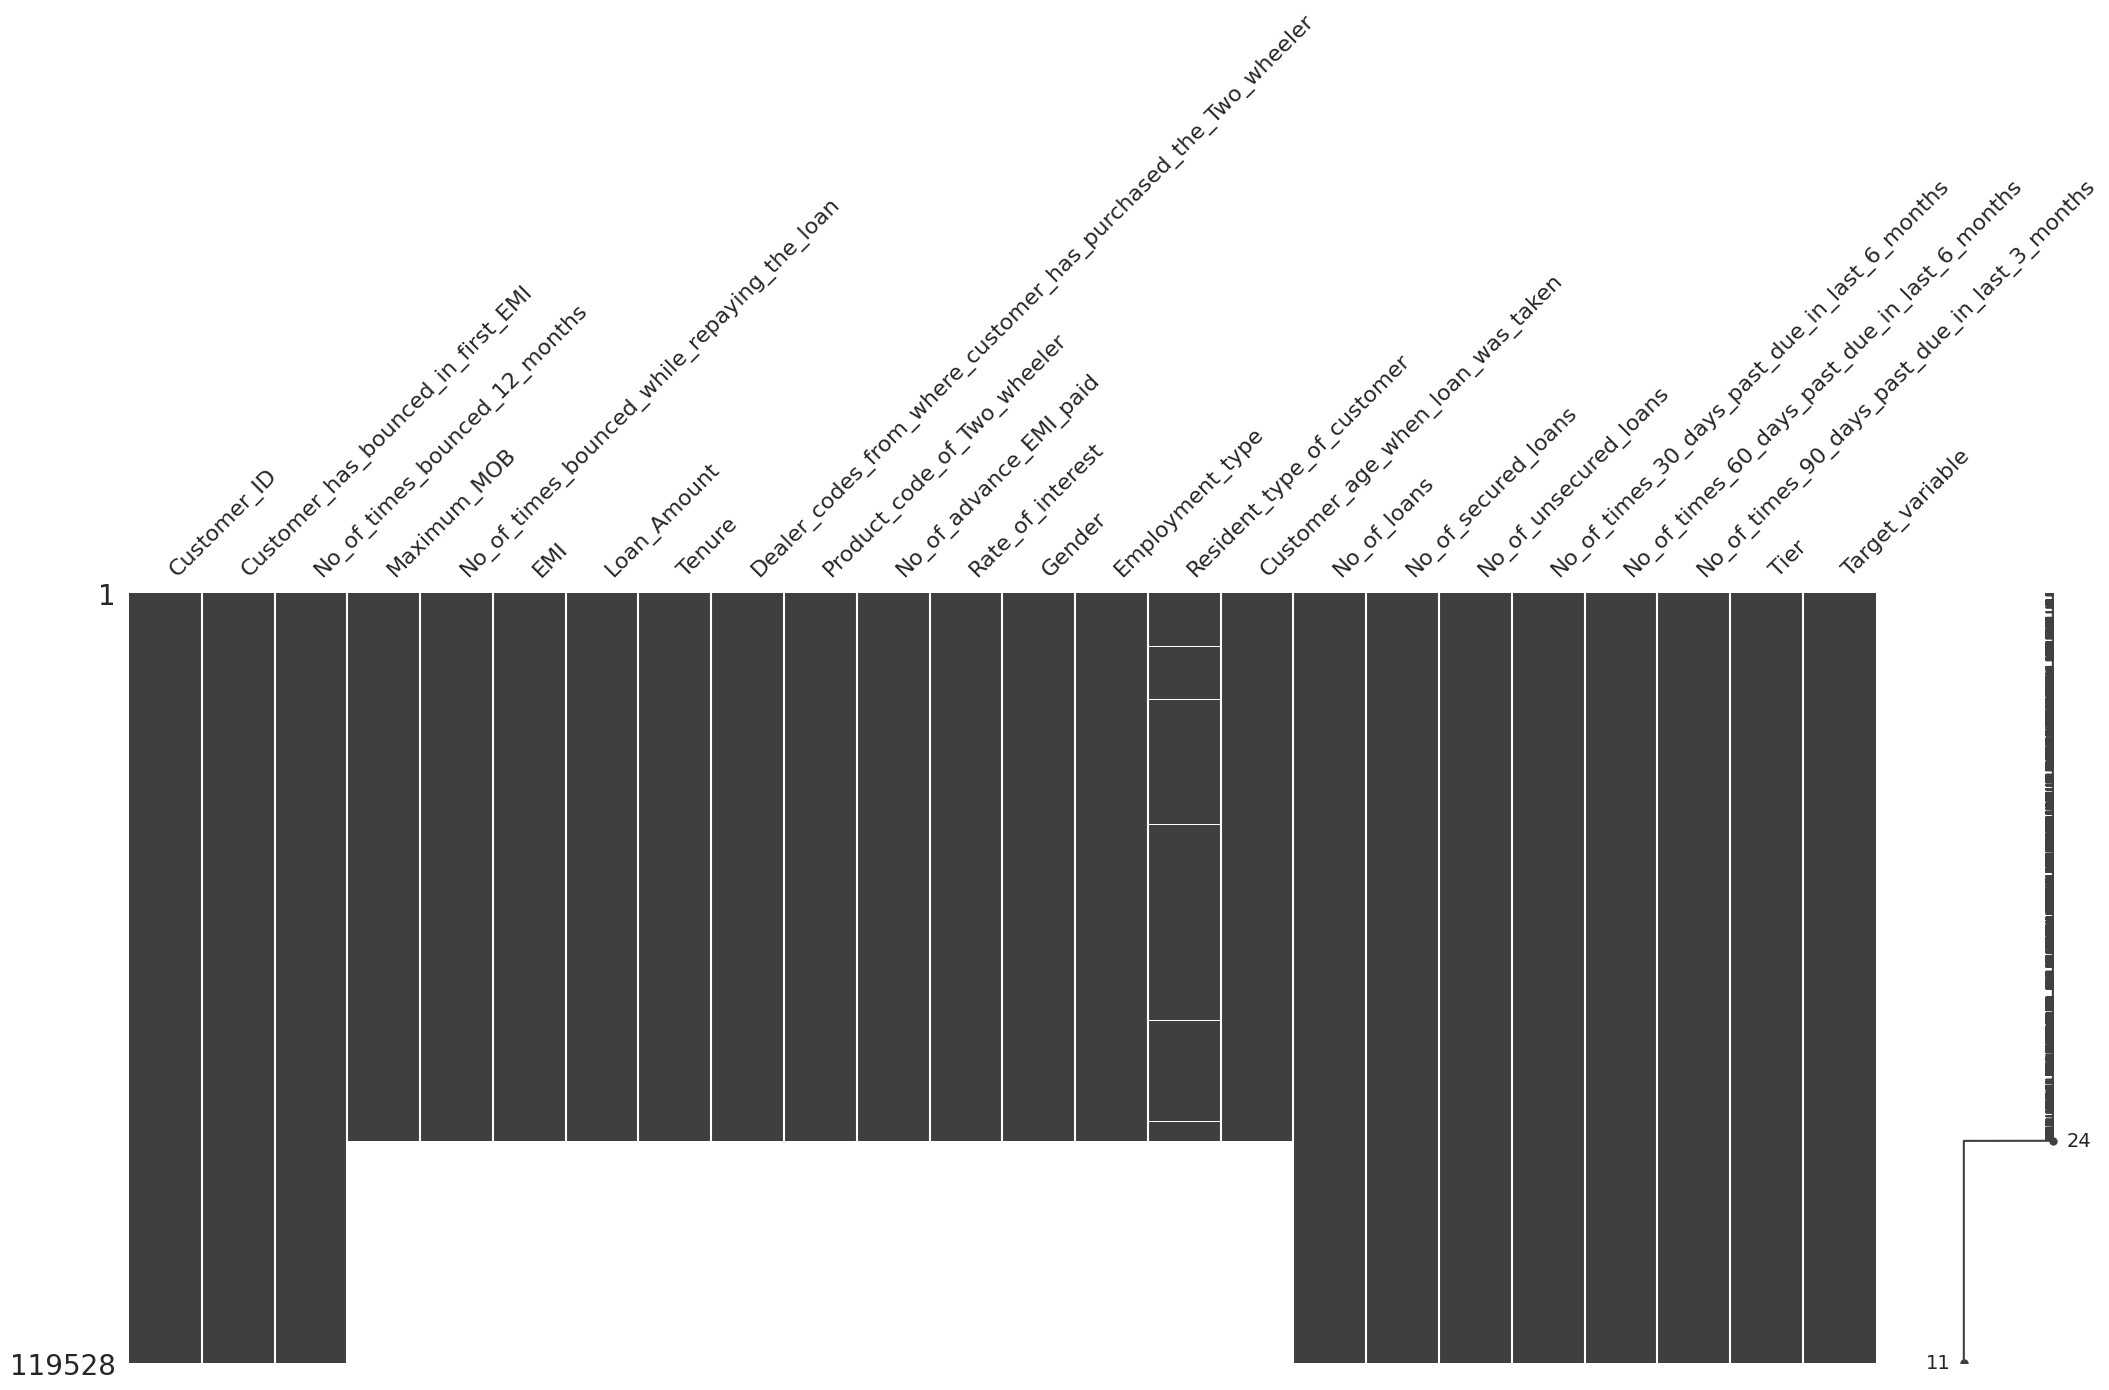

In [36]:
msno.matrix(credit_data)

<Axes: >

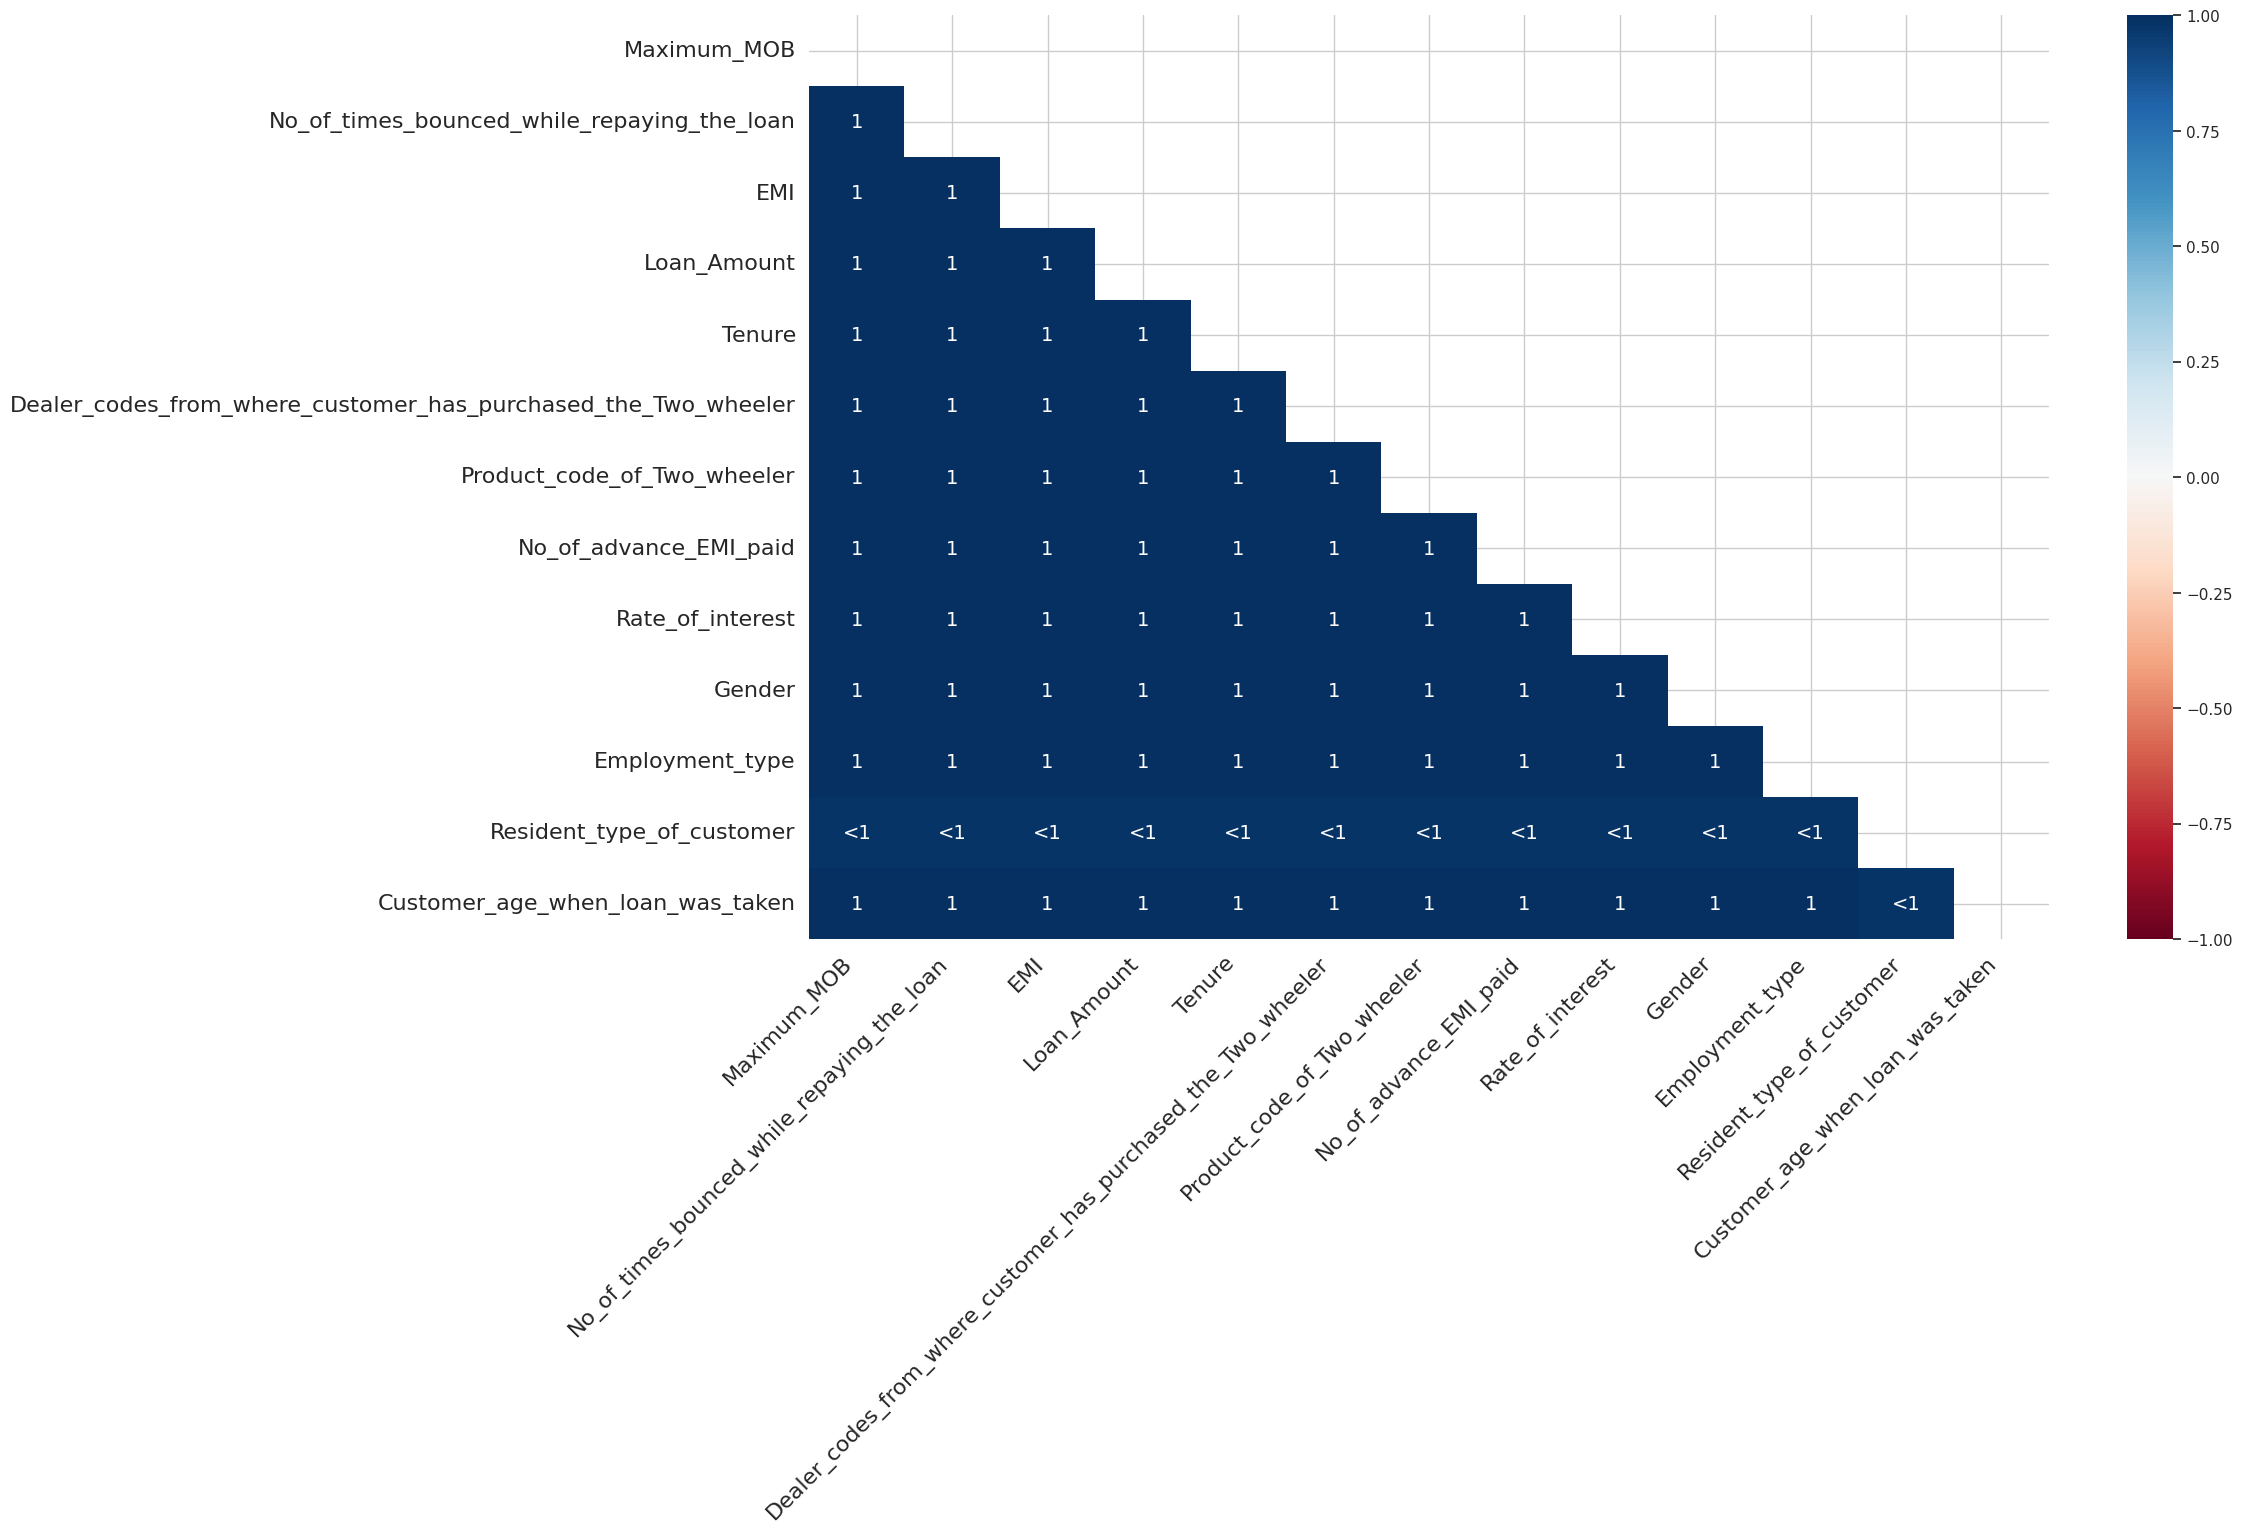

In [37]:
msno.heatmap(credit_data)

In [38]:
# Dropping rows with missing values in all the specified columns since missing values in the said columns are perfectly correlated
columns_to_check = ['Maximum_MOB','No_of_times_bounced_while_repaying_the_loan', 'EMI', 'Loan_Amount','Tenure',
                    'Dealer_codes_from_where_customer_has_purchased_the_Two_wheeler','Product_code_of_Two_wheeler',
                    'No_of_advance_EMI_paid','Rate_of_interest', 'Gender', 'Employment_type','Resident_type_of_customer',
                    'Customer_age_when_loan_was_taken']
credit_data = credit_data.dropna(how='all', subset=columns_to_check)

In [39]:
# Filling missing values in the Resident type of customer table using mode
credit_data['Resident_type_of_customer'] = credit_data['Resident_type_of_customer'].fillna(credit_data['Resident_type_of_customer'].mode()[0])

In [40]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85048 entries, 0 to 85047
Data columns (total 24 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Customer_ID                                                     85048 non-null  int64  
 1   Customer_has_bounced_in_first_EMI                               85048 non-null  int64  
 2   No_of_times_bounced_12_months                                   85048 non-null  int64  
 3   Maximum_MOB                                                     85048 non-null  float64
 4   No_of_times_bounced_while_repaying_the_loan                     85048 non-null  float64
 5   EMI                                                             85048 non-null  float64
 6   Loan_Amount                                                     85048 non-null  float64
 7   Tenure                                                

##**Data Analysis**

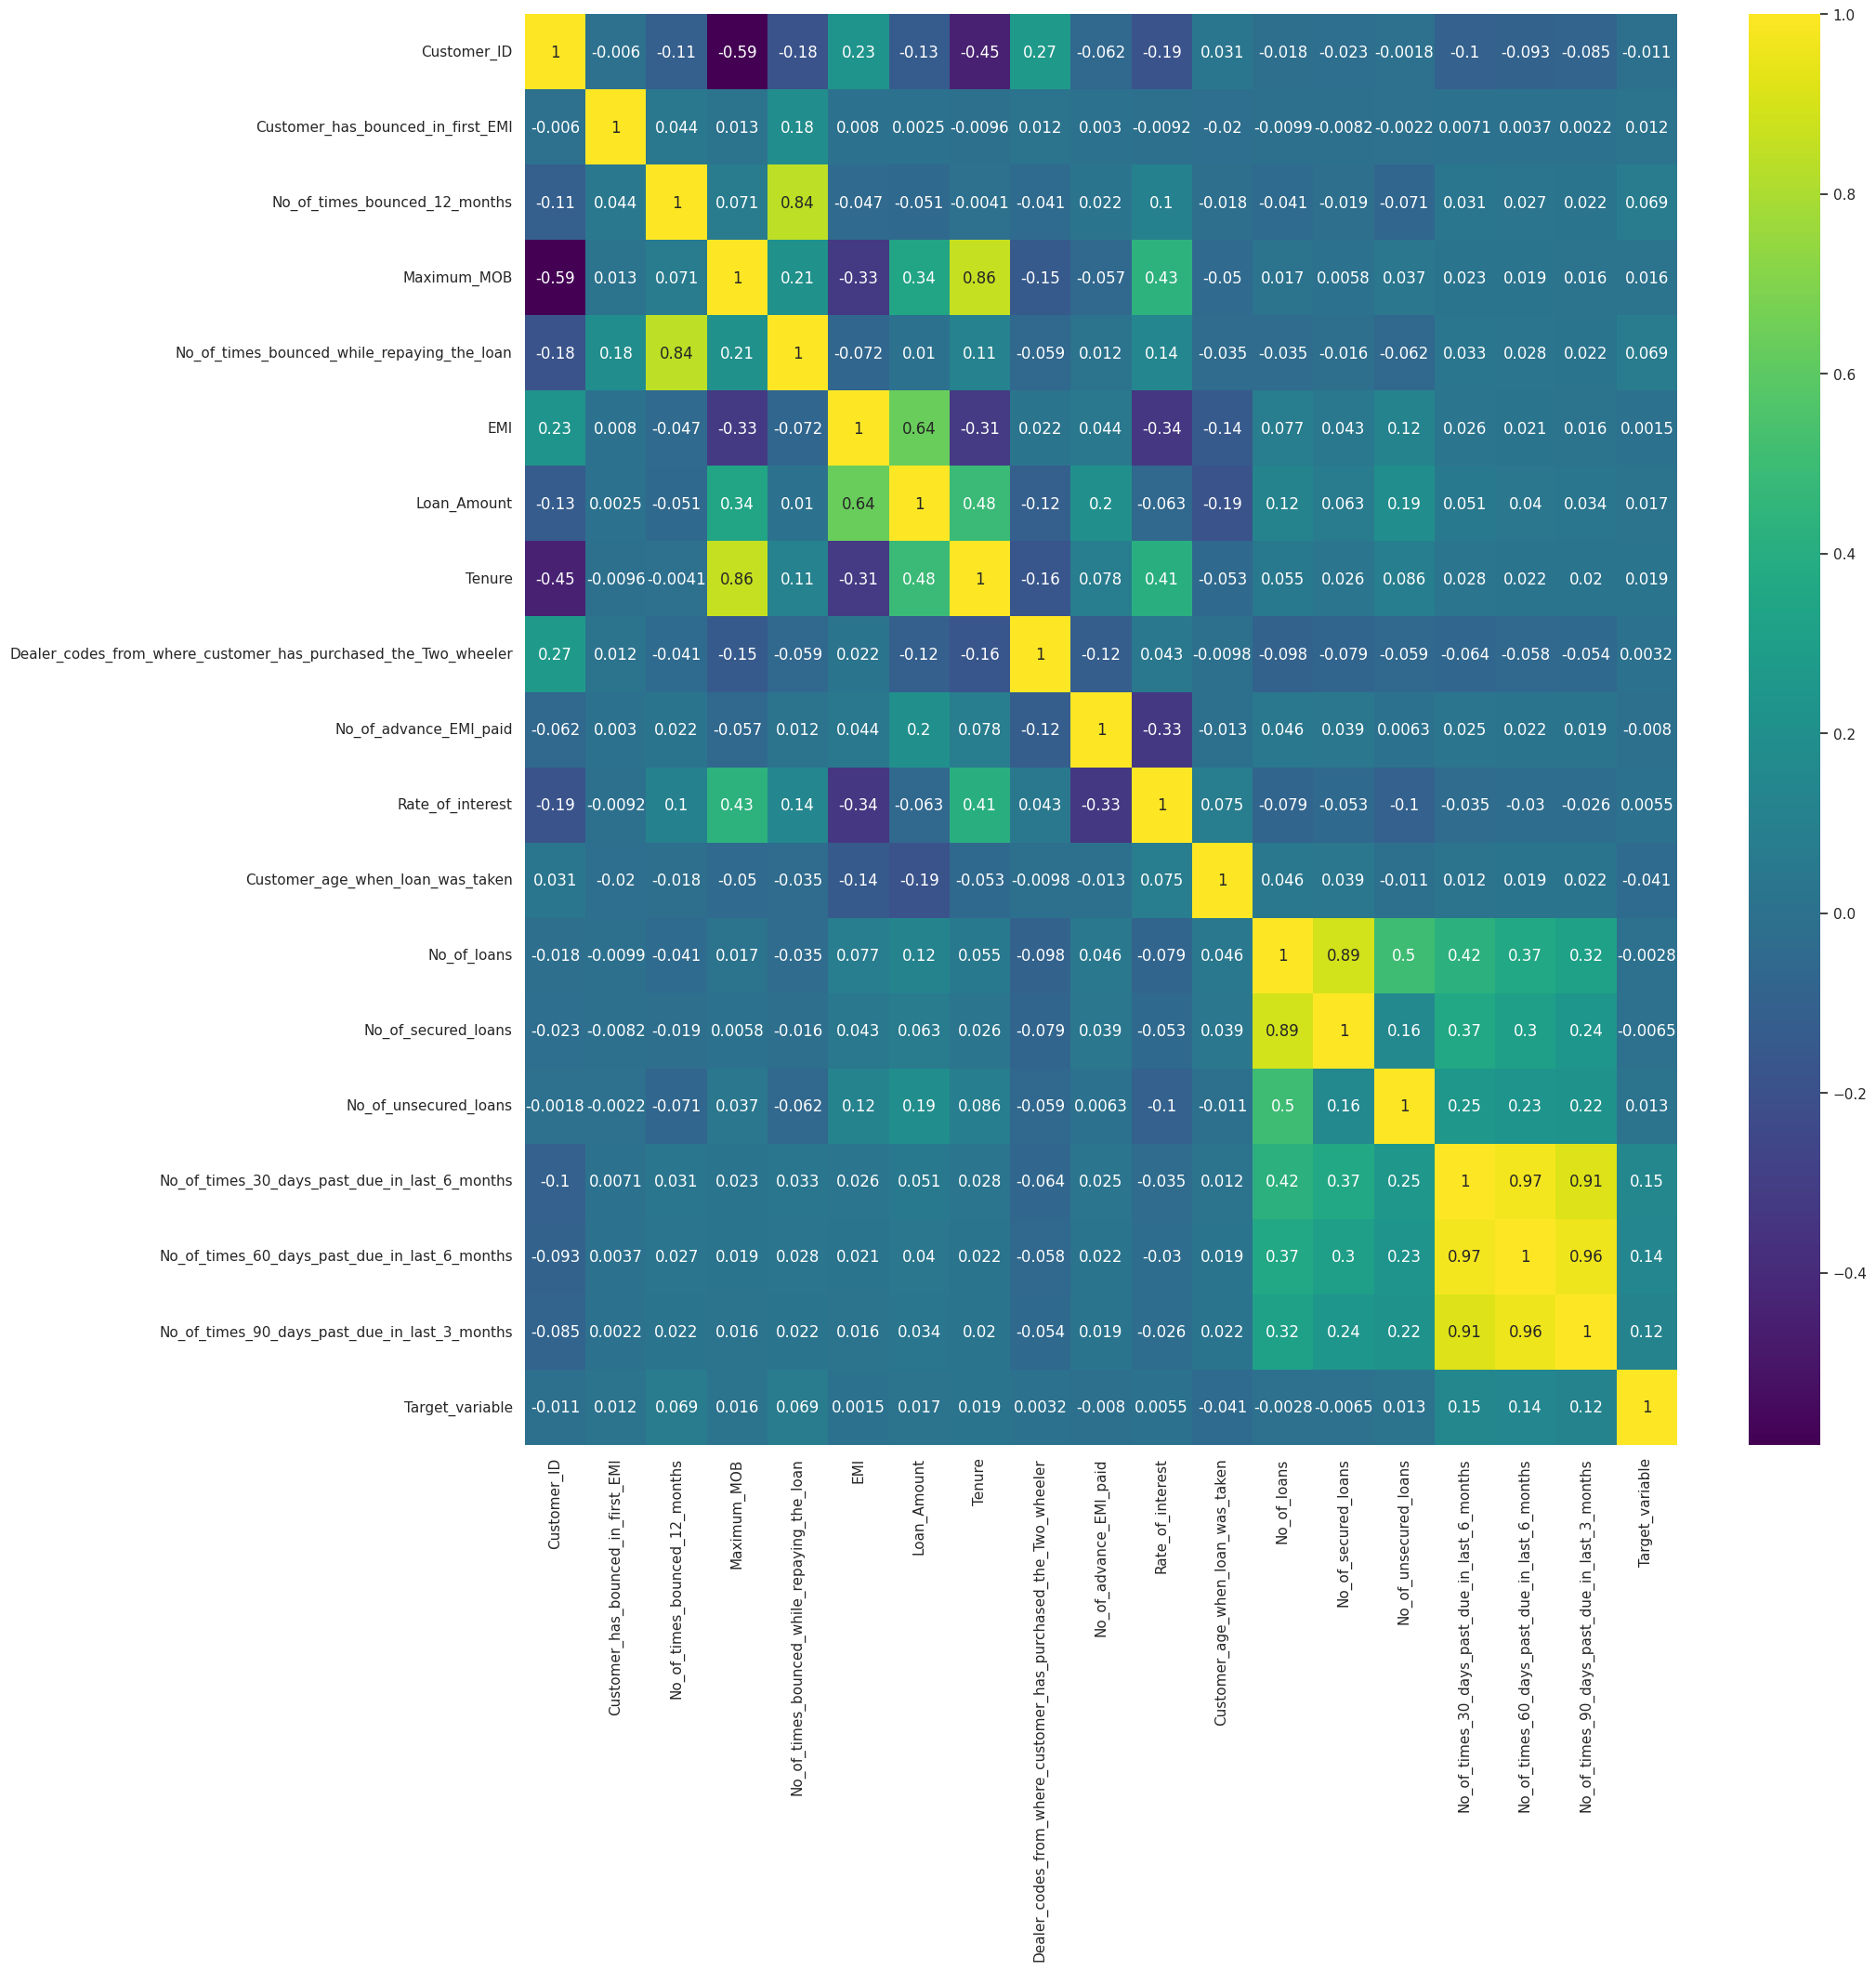

In [41]:
#correlation matrix
corrmat = credit_data.corr(numeric_only=True) # Add numeric_only=True to only include numeric features in calculation
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(credit_data[top_corr_features].corr(numeric_only=True),annot=True,cmap="viridis")

<Axes: title={'center': 'Loan_Amount (Box Plot)'}, xlabel='Employment_type', ylabel='Loan_Amount'>

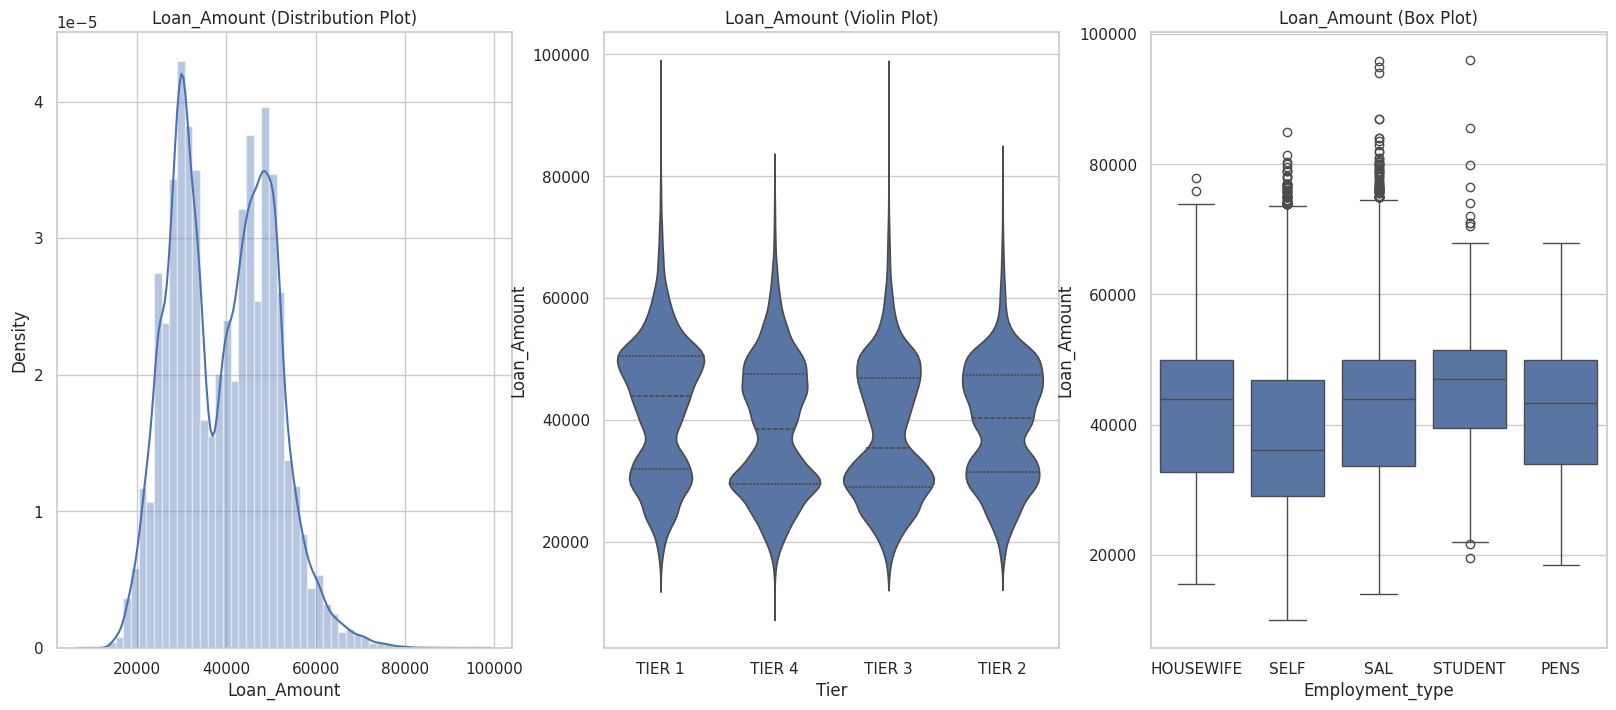

In [42]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan_Amount (Distribution Plot)") # Spread of loan amounts
sns.distplot(credit_data['Loan_Amount'],ax=ax[0])
ax[1].set_title("Loan_Amount (Violin Plot)") # Distribution of loan amounts across different tier categories
sns.violinplot(data =credit_data, x='Tier',y='Loan_Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan_Amount (Box Plot)") # Distribution of loan amounts across different employment type categories
sns.boxplot(data =credit_data, x='Employment_type',y='Loan_Amount',ax=ax[2],orient='v')

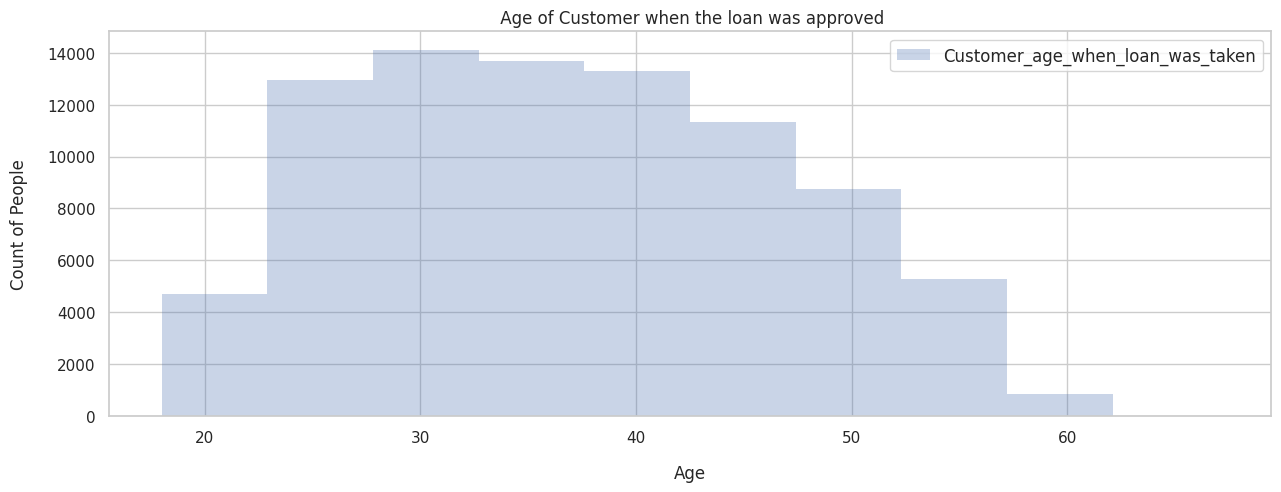

In [43]:
#Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
credit_data['Customer_age_when_loan_was_taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

<Axes: xlabel='Customer_age_when_loan_was_taken', ylabel='Loan_Amount'>

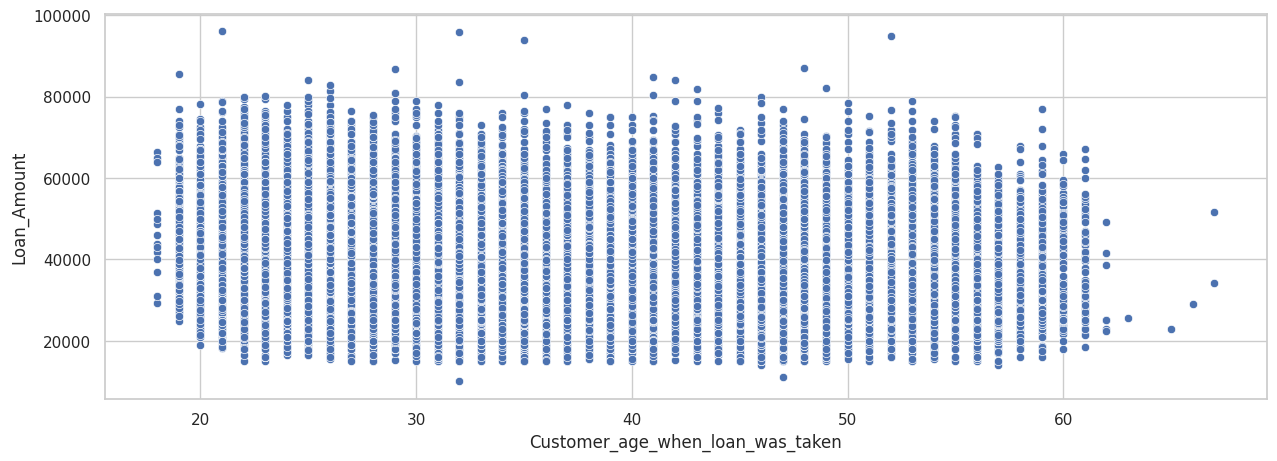

In [44]:
# Explore correlation between age and loan amount
plt.figure(figsize=(15,5))
sns.scatterplot(x=credit_data['Customer_age_when_loan_was_taken'],y='Loan_Amount',data=credit_data)

Target_variable
0    83194
1     1854
Name: count, dtype: int64


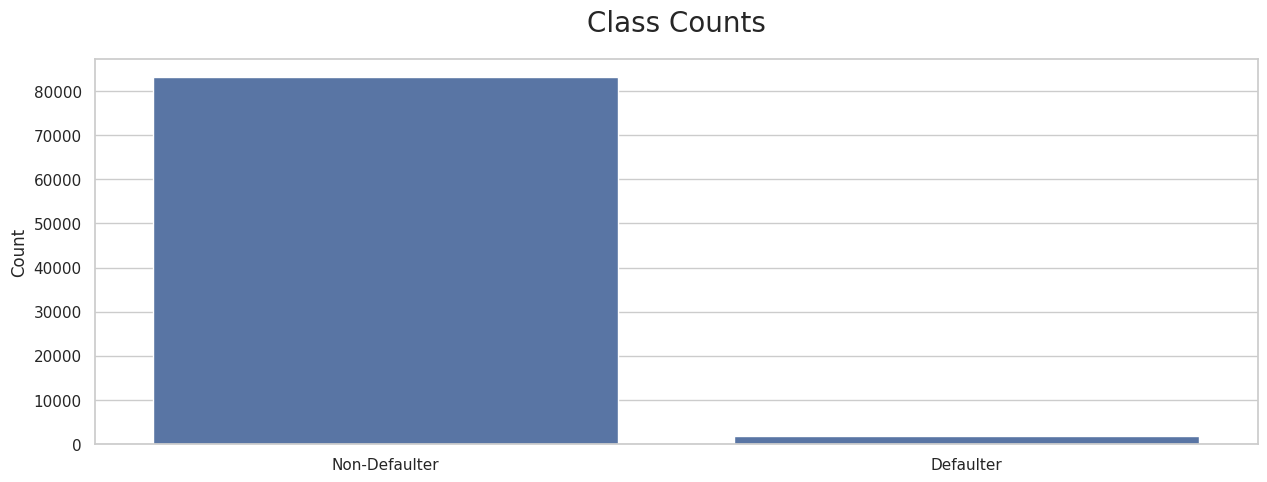

In [45]:
# Getting the number of positive and negative examples.
plt.figure(figsize=(15, 5))
sns.countplot(x='Target_variable', data=credit_data)
plt.xticks([0, 1], ["Non-Defaulter", "Defaulter"])  # mapping
plt.xlabel("")  # Remove x-axis label
plt.ylabel("Count")  # Add y-axis label
plt.title("Class Counts", y=1.05, fontdict={"fontsize": 20})

# Display the counts in the console
print(credit_data['Target_variable'].value_counts())

###**Data Encoding**

In [46]:
CatVariables = credit_data.select_dtypes(include=['object'])
categorical_cols = credit_data[CatVariables.columns]

In [47]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in CatVariables:
    credit_data[feature] = le.fit_transform(credit_data[feature].astype(str))


### **Data Scaling**

In [48]:
NumVariables = credit_data.select_dtypes(include=['int64', 'float64'])
numerical_cols = credit_data[NumVariables.columns]
numerical_cols = numerical_cols.drop(['Customer_ID','Target_variable'],axis=1)

In [49]:
# Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
credit_data[numerical_cols.columns] = scaler.fit_transform(credit_data[numerical_cols.columns])

In [50]:
credit_data.head()

,Customer_ID,Customer_has_bounced_in_first_EMI,No_of_times_bounced_12_months,Maximum_MOB,No_of_times_bounced_while_repaying_the_loan,EMI,Loan_Amount,Tenure,Dealer_codes_from_where_customer_has_purchased_the_Two_wheeler,Product_code_of_Two_wheeler,...,Resident_type_of_customer,Customer_age_when_loan_was_taken,No_of_loans,No_of_secured_loans,No_of_unsecured_loans,No_of_times_30_days_past_due_in_last_6_months,No_of_times_60_days_past_due_in_last_6_months,No_of_times_90_days_past_due_in_last_3_months,Tier,Target_variable
0,1,-0.172226,-0.552427,1.303598,-0.632855,0.184671,0.650105,0.515884,-0.566681,0.914431,...,-0.378450,0.303091,-0.374565,-0.229357,-0.367180,-0.28847,-0.257019,-0.230534,-1.542631,0
1,2,-0.172226,0.611609,1.303598,0.283188,-1.443164,-1.013936,0.515884,-0.270782,-0.492900,...,2.578776,1.011164,-0.374565,-0.229357,-0.367180,-0.28847,-0.257019,-0.230534,-1.542631,0
2,3,-0.172226,-0.552427,1.687978,-0.632855,-1.074860,-0.039766,1.568725,-0.577069,0.914431,...,2.578776,-0.607288,0.746070,0.676121,0.839354,7.94943,9.334853,10.356111,-1.542631,0
3,4,-0.172226,-0.552427,1.303598,-0.632855,-0.343463,0.323324,0.515884,-0.569345,0.914431,...,2.578776,-1.315361,-0.374565,-0.229357,-0.367180,-0.28847,-0.257019,-0.230534,-1.542631,0
4,5,-0.172226,-0.552427,1.880169,-0.632855,-0.871598,0.141779,1.568725,0.167075,-1.196565,...,2.578776,-0.708442,-0.374565,-0.229357,-0.367180,-0.28847,-0.257019,-0.230534,-1.542631,0


##**Dealing with class imbalance**

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
# Splitting the dataset to feature and target variables
X=credit_data.drop(['Customer_ID','Target_variable'],axis=1)
y=credit_data["Target_variable"]

(166388, 22) (166388,)


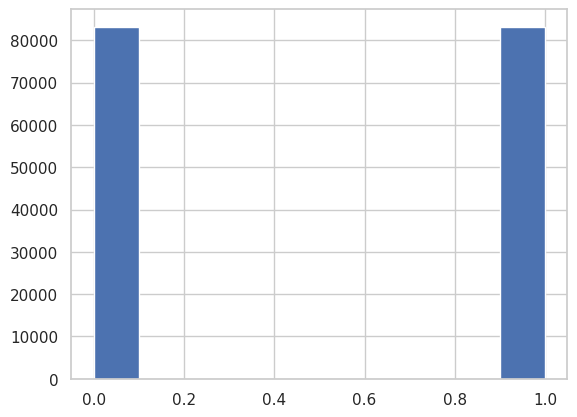

In [69]:
# generating sythetic samples fro the minority class
smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
X_res, y_res=smote_sample.fit_resample(X, y)

# now plot the classes to see if theyre balanced
y_res.hist()
print(X_res.shape,y_res.shape)

In [70]:
# Splitting the data into a training set and a testing set before resampling
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
print("Train and Test Set Sizes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)
print("X_val:", X_val.shape, "y_val:", y_val.shape)


Train and Test Set Sizes:
X_train: (99832, 22) y_train: (99832,)
X_test: (33278, 22) y_test: (33278,)
X_val: (33278, 22) y_val: (33278,)


##**Classification**

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

##**Logistic Regression Classifiction**

In [71]:
# Applying logistic Regression
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)

# predicting on the test data
y_pred = model.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78     16569
           1       0.80      0.71      0.75     16709

    accuracy                           0.77     33278
   macro avg       0.77      0.77      0.76     33278
weighted avg       0.77      0.77      0.76     33278

Confusion Matrix:
 [[13627  2942]
 [ 4860 11849]]
Accuracy: 0.765550814351824
Precision: 0.8010952606314651
Recall: 0.7091387874798013
F1 Score: 0.7523174603174603


In [72]:
# Logistic Regression with L1 regularization (Lasso)
lasso_log_reg = make_pipeline(StandardScaler(),LogisticRegression(penalty='l1', solver='saga', C=1.0))
lasso_log_reg.fit(X_train, y_train)

# Predictions and accuracy
y_pred_lasso = lasso_log_reg.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred_lasso))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lasso))
print("Accuracy:", accuracy_score(y_val, y_pred_lasso))
print("Precision:", precision_score(y_val, y_pred_lasso))
print("Recall:", recall_score(y_val, y_pred_lasso))
print("F1 Score:", f1_score(y_val, y_pred_lasso))


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78     16569
           1       0.80      0.71      0.75     16709

    accuracy                           0.76     33278
   macro avg       0.77      0.76      0.76     33278
weighted avg       0.77      0.76      0.76     33278

Confusion Matrix:
 [[13590  2979]
 [ 4897 11812]]
Accuracy: 0.7633271230242202
Precision: 0.7985937394361436
Recall: 0.7069244119935364
F1 Score: 0.749968253968254


In [73]:
# Logistic Regression with L2 regularization (Ridge)
ridge_log_reg = make_pipeline(StandardScaler(),LogisticRegression(penalty='l2', solver='lbfgs', C=1.0, random_state=42))
ridge_log_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_log_reg.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred_ridge))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_ridge))
print("Accuracy:", accuracy_score(y_val, y_pred_ridge))
print("Precision:", precision_score(y_val, y_pred_ridge))
print("Recall:", recall_score(y_val, y_pred_ridge))
print("F1 Score:", f1_score(y_val, y_pred_ridge))



Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.78     16569
           1       0.80      0.71      0.75     16709

    accuracy                           0.77     33278
   macro avg       0.77      0.77      0.76     33278
weighted avg       0.77      0.77      0.76     33278

Confusion Matrix:
 [[13627  2942]
 [ 4860 11849]]
Accuracy: 0.765550814351824
Precision: 0.8010952606314651
Recall: 0.7091387874798013
F1 Score: 0.7523174603174603


##**Decision Tree Classifier**

In [74]:
# Decision Tree Classifier
dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())

# Predictions
dt.fit(X_train, y_train)
y_pred = dt.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97     16569
           1       0.97      0.98      0.97     16709

    accuracy                           0.97     33278
   macro avg       0.97      0.97      0.97     33278
weighted avg       0.97      0.97      0.97     33278

Confusion Matrix:
 [[15982   587]
 [  380 16329]]
Accuracy: 0.970941763327123
Precision: 0.9652991250886734
Recall: 0.9772577652761985
F1 Score: 0.9712416356877324


##**Random Forest classifier**

In [75]:
# Random Forest Classifier
rf = make_pipeline(StandardScaler(), RandomForestClassifier(criterion='gini'))

# Predictions
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)

# Performance Metrics
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     16569
           1       0.99      0.99      0.99     16709

    accuracy                           0.99     33278
   macro avg       0.99      0.99      0.99     33278
weighted avg       0.99      0.99      0.99     33278

Confusion Matrix:
 [[16448   121]
 [  238 16471]]
Accuracy: 0.9892120920728409
Precision: 0.9927073288331726
Recall: 0.9857561793045664
F1 Score: 0.9892195429566679


##**HyperParemeter Tuning**

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, 20, 25],
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42, criterion='gini'),
                                   param_distributions=param_dist,
                                   n_iter=20,
                                   cv=3,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   random_state=42)

# Fit the model
random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

# Print best parameters and accuracy
print("Best Parameters from Randomized Search:\n", random_search.best_params_)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Best Parameters from Randomized Search:
 {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 74}
Precision: 0.9891580860084798
Recall: 0.9837951807228915
F1 Score: 0.9864693446088795


##**Generating Credit Scores and Categorizing Customers**

In [77]:
model = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=42, criterion='gini'))
model.fit(X_train_res, y_train_res)
probabilities = model.predict_proba(X_test)[:, 1]  # Probability of being a defaulter

# Scale probabilities to credit scores (0-800)
credit_scores = probabilities * 800

# Add credit scores to DataFrame
X_test_df = pd.DataFrame(X_test, columns=credit_data.drop('Target_variable', axis=1).columns)
X_test_df['Credit_Score'] = credit_scores

In [78]:
# Categorizing customers
# Define categorization function
def categorize_customer(score):
    if score <= 200:
        return "Bad Customer"
    elif 201 <= score <= 350:
        return "2nd Worst"
    elif 351 <= score <= 500:
        return "Not So Bad"
    elif 501 <= score <= 700:
        return "Ideal Guys"
    else:
        return "Big Loans"

# Apply categorization
X_test_df['Category'] = X_test_df['Credit_Score'].apply(categorize_customer)

# Display categorized data
print(X_test_df[['Credit_Score', 'Category']].head())

        Credit_Score      Category
21473           88.0  Bad Customer
153345         800.0     Big Loans
12339            8.0  Bad Customer
92470          672.0    Ideal Guys
26278            0.0  Bad Customer
